In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
credits_df = pd.read_csv('dataset/credits.csv')
titles_df = pd.read_csv('dataset/titles.csv')

In [4]:
credits_df
unique_count = credits_df['id'].nunique()
print(unique_count)

5489


In [5]:
titles_df
unique_count = titles_df['id'].nunique()
print(unique_count)


5850


In [6]:
combined_df = pd.merge(titles_df, credits_df, left_on = "id", right_on = "id")
combined_df = combined_df.drop('character', axis=1)
combined_df.dropna(subset=['title'], inplace=True)
combined_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,role
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,3748,Robert De Niro,ACTOR
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,14658,Jodie Foster,ACTOR
2,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,7064,Albert Brooks,ACTOR
3,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,3739,Harvey Keitel,ACTOR
4,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,48933,Cybill Shepherd,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77796,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300,736339,Adelaida Buscato,ACTOR
77797,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300,399499,Luz Stella Luengas,ACTOR
77798,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300,373198,Inés Prieto,ACTOR
77799,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300,378132,Isabel Gaona,ACTOR


In [7]:
combined_df.drop(columns=['seasons'], inplace=True)
combined_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,role
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179,3748,Robert De Niro,ACTOR
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179,14658,Jodie Foster,ACTOR
2,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179,7064,Albert Brooks,ACTOR
3,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179,3739,Harvey Keitel,ACTOR
4,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179,48933,Cybill Shepherd,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77796,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],tt14585902,3.8,68.0,26.005,6.300,736339,Adelaida Buscato,ACTOR
77797,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],tt14585902,3.8,68.0,26.005,6.300,399499,Luz Stella Luengas,ACTOR
77798,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],tt14585902,3.8,68.0,26.005,6.300,373198,Inés Prieto,ACTOR
77799,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],tt14585902,3.8,68.0,26.005,6.300,378132,Isabel Gaona,ACTOR


In [8]:
actor_counts = combined_df['person_id'].value_counts()
actors_more_than_one_movie = actor_counts[actor_counts > 1].index

filtered_df = combined_df[combined_df['person_id'].isin(actors_more_than_one_movie)]

In [9]:


actor_avg_scores = filtered_df.groupby('name')['imdb_score'].mean().reset_index().dropna()
actor_avg_scores

,name,imdb_score
0,'Weird Al' Yankovic,6.500000
1,50 Cent,6.866667
2,A$AP Rocky,6.650000
3,A. L. Vijay,6.000000
4,A.D. Miles,6.766667
...,...,...
11893,Łukasz Simlat,6.600000
11894,Şafak Sezer,7.133333
11895,Şebnem Bozoklu,5.050000
11896,Şenol Sönmez,5.150000


In [10]:
top100Actors=actor_avg_scores.sort_values(by='imdb_score', ascending=False)
top100Actors=top100Actors.head(10)

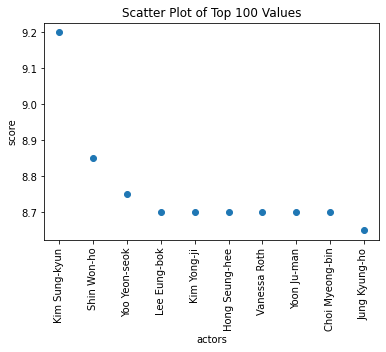

<Figure size 360x1440 with 0 Axes>

In [11]:
x = top100Actors['name']
y = top100Actors['imdb_score']

# Create scatter plot
plt.scatter(x, y)
plt.xlabel('actors')
plt.ylabel('score')
plt.title('Scatter Plot of Top 100 Values')
plt.xticks(rotation=90)
plt.figure(figsize=(5, 20))
plt.show()

In [12]:
# pivot_df = combined_df.pivot_table(index=['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
#                           columns='role',
#                           values='name',
#                           aggfunc=lambda x: ', '.join(x)).reset_index()
# pivot_df
# Pivot the table
pivot_df = combined_df.pivot_table(index=combined_df.index, columns='role', values='name', aggfunc='first')

# Reset index if needed
pivot_df.reset_index(drop=True, inplace=True)
pivot_df

role,ACTOR,DIRECTOR
0,Robert De Niro,NaN
1,Jodie Foster,NaN
2,Albert Brooks,NaN
3,Harvey Keitel,NaN
4,Cybill Shepherd,NaN
...,...,...
77795,Adelaida Buscato,NaN
77796,Luz Stella Luengas,NaN
77797,Inés Prieto,NaN
77798,Isabel Gaona,NaN


In [13]:
movies = combined_df[combined_df['type'] != 'SHOW']
movies

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,role
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179,3748,Robert De Niro,ACTOR
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179,14658,Jodie Foster,ACTOR
2,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179,7064,Albert Brooks,ACTOR
3,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179,3739,Harvey Keitel,ACTOR
4,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179,48933,Cybill Shepherd,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77796,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],tt14585902,3.8,68.0,26.005,6.300,736339,Adelaida Buscato,ACTOR
77797,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],tt14585902,3.8,68.0,26.005,6.300,399499,Luz Stella Luengas,ACTOR
77798,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],tt14585902,3.8,68.0,26.005,6.300,373198,Inés Prieto,ACTOR
77799,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],tt14585902,3.8,68.0,26.005,6.300,378132,Isabel Gaona,ACTOR


In [14]:
grouped_df = movies.groupby('title').agg(set).reset_index()
grouped_df

,title,id,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,role
0,#Alive,{tm820190},{MOVIE},"{As a grisly virus rampages a city, a lone man...",{2020},{nan},{98},"{['horror', 'thriller', 'action', 'drama']}",{['KR']},{tt10620868},{6.3},{38313.0},{58.967},{7.3},"{1694208, 1589377, 1395591, 1433480, 2041863, ...","{Cho Il, Lee Chae-kyung, Yoo Yeon, Son Kyoung-...","{DIRECTOR, ACTOR}"
1,#AnneFrank. Parallel Stories,{tm817087},{MOVIE},{One single Anne Frank moves us more than the ...,{2019},{nan},{92},"{['drama', 'history', 'documentation']}",{['IT']},{tt9850370},{6.5},{1548.0},{8.19},{7.1},"{304261, 1070479, 7184, 1137907, 1421429, 1145...","{Martina Gatti, Helen Mirren, Sabina Fedeli, A...","{DIRECTOR, ACTOR}"
2,#FriendButMarried,{tm371188},{MOVIE},"{Pining for his high school crush for years, a...",{2018},{nan},{102},"{['romance', 'comedy', 'drama']}",{['ID']},{tt8076266},{6.8},{714.0},{1.257},{6.7},"{1314956, 311958, 146968, 877984, 877995, 6915...","{Ridwan Kamil, Ivan Leonardy, Rival Soebandri,...","{DIRECTOR, ACTOR}"
3,#FriendButMarried 2,{tm846354},{MOVIE},{As Ayu and Ditto finally transition from best...,{2020},{nan},{104},"{['drama', 'comedy', 'romance']}",{['ID']},{tt11640412},{6.9},{311.0},{2.063},{7.5},"{1244438, 146968, 1486108, 1314862, 877998, 13...","{Ivan Leonardy, Sarah Sechan, Ravil Prasetya, ...","{DIRECTOR, ACTOR}"
4,#Rucker50,{tm286268},{MOVIE},{The celebratory explosion of basketball histo...,{2016},{nan},{56},{['documentation']},{['US']},{tt6475636},{5.2},{120.0},{1.645},{3.7},{612653},{Robert McCullough Jr.},{DIRECTOR}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,"ariana grande: excuse me, i love you",{tm982100},{MOVIE},{Ariana Grande takes the stage in London for h...,{2020},{nan},{97},"{['documentation', 'music']}",{['US']},{tt13615386},{6.3},{2591.0},{23.124},{8.4},"{1732224, 1731968, 1731970, 1732226, 1731979, ...","{Cory Graves, Victoria Monét, Darrion Gallegos...","{DIRECTOR, ACTOR}"
3626,iBoy,{tm300184},{MOVIE},"{After an accident, Tom wakes from a coma to d...",{2017},{nan},{90},"{['scifi', 'action', 'crime', 'thriller']}",{['GB']},{tt3171832},{6.0},{22594.0},{14.284},{6.0},"{305027, 31879, 4873, 61068, 232595, 627614, 6...","{Susan Fordham, Armin Karima, Miranda Richards...","{DIRECTOR, ACTOR}"
3627,"tick, tick... BOOM!",{tm979026},{MOVIE},"{On the cusp of his 30th birthday, Jonathon La...",{2021},{PG-13},{121},{['drama']},{['US']},{tt8721424},{7.5},{98370.0},{33.246},{7.8},"{2143234, 770569, 1983497, 903186, 93208, 2143...","{Amanda Green, Lane Napper, Robin de Jesús, Ma...","{DIRECTOR, ACTOR}"
3628,"¡Ay, mi madre!",{tm462551},{MOVIE},"{When her estranged mother suddenly dies, a wo...",{2019},{nan},{81},"{['comedy', 'european']}",{['ES']},{tt6213294},{3.9},{404.0},{4.204},{4.3},"{50624, 72640, 15910, 124169, 71691, 33521, 28...","{Secun de la Rosa, Marta Torné, Concha Galán, ...","{DIRECTOR, ACTOR}"


Average score by genre (MOVIES)

In [15]:
import ast

movies_genres_df = movies.copy().reset_index()

# Initialize an empty list to store all genres
genres_list = []

# Use ast.literal_eval to store all genres into a list
for x in movies_genres_df['genres']:
    y = ast.literal_eval(x)
    genres_list.extend(y)

# Remove duplicates
genres_set = list(set(genres_list))

# Create a DataFrame of genres with binary values (0 or 1)
genres_df = movies_genres_df['genres'].apply(lambda x: pd.Series([1 if genre in ast.literal_eval(x) else 0 for genre in genres_set], index=genres_set))

# Concatenate the new DataFrame with the original one
movies_genres_df = pd.concat([movies_genres_df, genres_df], axis=1)

# Drop NaN values in 'imdb_score' column
movies_genres_df = movies_genres_df.dropna(subset=['imdb_score'])

# Drop the 'genres' column
movies_genres_df = movies_genres_df.drop('genres', axis=1)

# Drop duplicates based on the 'id' column
movies_genres_df = movies_genres_df.drop_duplicates(subset='id')

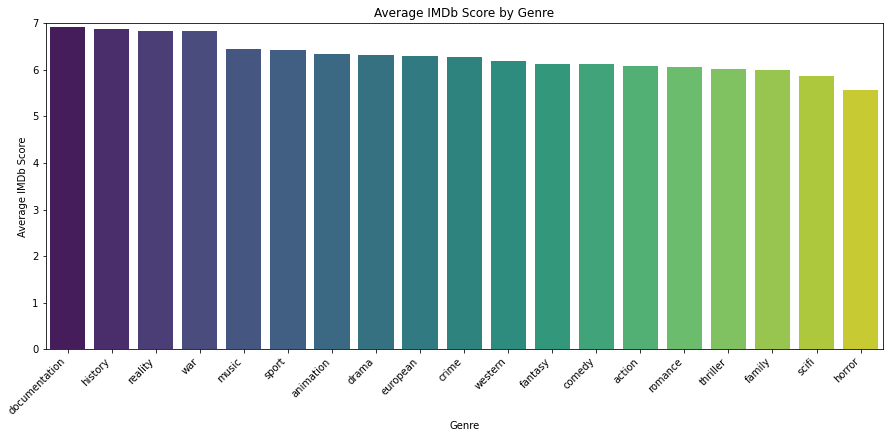

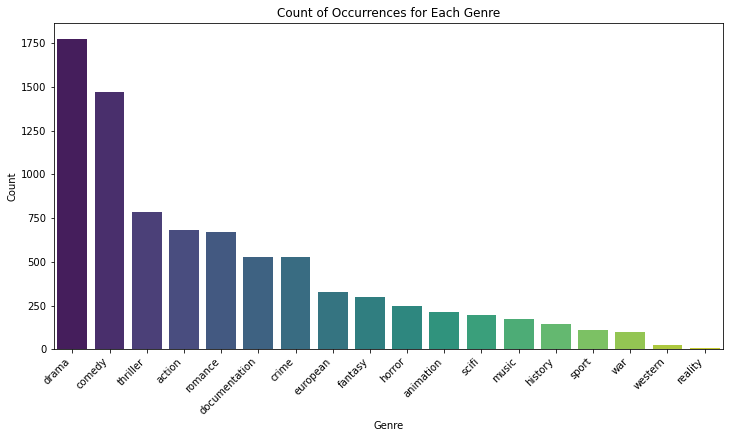

In [16]:
movies_genres_df.reset_index(drop=True, inplace=True)

# Calculate the average IMDb score for each genre
average_scores_by_genre = {}
for genre in genres_set:
    genre_columns = [col for col in movies_genres_df.columns if genre in col]
    average_scores_by_genre[genre] = movies_genres_df[movies_genres_df[genre_columns].any(axis=1)]['imdb_score'].mean()

# Convert the result into a DataFrame
average_scores_df = pd.DataFrame(list(average_scores_by_genre.items()), columns=['Genre', 'Average IMDb Score'])

# Sort genres by average score in descending order
average_scores_df = average_scores_df.sort_values(by='Average IMDb Score', ascending=False)


# Plotting Average Scores
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
sns.barplot(x=average_scores_df['Genre'], y=average_scores_df['Average IMDb Score'], palette='viridis')
plt.title('Average IMDb Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Average IMDb Score')
plt.ylim(0,7)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

genre_counts = movies_genres_df.iloc[:, 18:].sum()
genre_counts = genre_counts.sort_values(ascending=False)

# Plotting the count of occurrences for each genre
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Count of Occurrences for Each Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

Genres vs iMDB popularity (MOVIES)

{'crime': 27690209.0, 'drama': 61105475.0, 'european': 12057666.0, 'action': 34922444.0, 'thriller': 43440824.0, 'fantasy': 11365045.0, 'comedy': 25994454.0, 'war': 6107839.0, 'romance': 15364879.0, 'western': 3260946.0, 'documentation': 2954786.0, 'history': 5911254.0, 'music': 3649459.0, 'horror': 9584488.0, 'scifi': 13258911.0, 'animation': 3490624.0, 'sport': 2317001.0, 'reality': 72778.0}


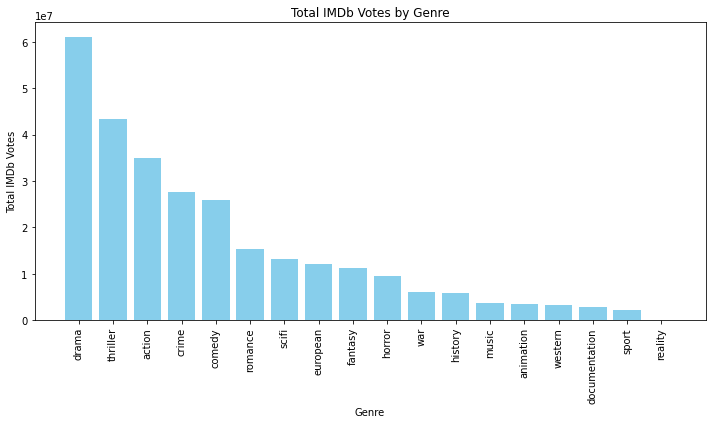

In [40]:
votes = {}

# Drop rows with missing values in the 'imdb_votes' column
cleaned_movies_df = movies_genres_df.dropna(subset=['imdb_votes'])

# Iterate over the index and values of the cleaned DataFrame
for index, row in cleaned_movies_df.iterrows():
    for genre in row.index[18:]:
        if row[genre] == 1:
            # Add the IMDb votes to the total for that genre
            votes[genre] = votes.get(genre, 0) + row['imdb_votes']

# Display the genre votes
print(votes)

# Convert the votes dictionary to a DataFrame for easier plotting
genre_votes_df = pd.DataFrame(list(votes.items()), columns=['Genre', 'Total Votes'])

# Sort the genre votes in descending order
genre_votes_df = genre_votes_df.sort_values(by='Total Votes', ascending=False)
genre_votes_df

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(genre_votes_df['Genre'], genre_votes_df['Total Votes'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Total IMDb Votes')
plt.title('Total IMDb Votes by Genre')
plt.xticks(rotation=90)  # Rotate genre labels for better readability
plt.tight_layout()
plt.show()



Count number of movies that are in each genre

In [44]:
movies_genres_df

num_genres = {}

for index, row in movies_genres_df.iterrows():
    for genre in row.index[18:]:
        if row[genre] == 1:
            num_genres[genre] = num_genres.get(genre, 0) + 1

num_genres
num_genres_df = pd.DataFrame(list(num_genres.items()), columns=['Genre', 'Number of Movies'])
num_genres_df = num_genres_df.sort_values(by='Number of Movies', ascending=False)
num_genres_df

,Genre,Number of Movies
1,drama,1776
6,comedy,1472
4,thriller,786
3,action,682
8,romance,673
10,documentation,530
0,crime,529
2,european,326
5,fantasy,300
13,horror,245
